In [1]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pickle

In [2]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
file = tf.keras.utils
raw_df = pd.read_csv("./train/generated_data_labelled.tsv", sep="\t").drop(['Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], axis=1)
raw_df.head()

Unnamed: 0  id  cat          wage      expenses         estate  \
0           0   0    0  17250.878209  21432.336280    5206.628252   
1           1   1    0  23213.126651  22983.210530  675753.606230   
2           2   2    0  42057.963992  48886.535663  219406.703170   
3           3   3    0  55064.065117  60113.316967  382566.966769   
4           4   4    0  23047.972305  27713.704638  354120.981907   

   is_fraudster_1  is_fraudster_2  is_fraudster_3  is_fraudster_4  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   is_fraudster  
0             0  
1             0  
2             0  
3             0  
4             0

In [4]:
raw_df[['id', 'cat', 'wage', 'expenses', 'estate', 'is_fraudster']].describe()

id            cat          wage      expenses        estate  \
count  199200.000000  199200.000000  1.992000e+05  1.992000e+05  1.992000e+05   
mean    99599.500000       1.685743  2.578440e+04  3.097465e+04  2.162237e+05   
std     57504.231149       1.266912  1.800875e+04  2.077417e+04  9.642644e+05   
min         0.000000       0.000000 -6.338986e+03  8.810686e+01 -3.463754e+04   
25%     49799.750000       1.000000  1.650784e+04  2.038801e+04  1.788334e+04   
50%     99599.500000       2.000000  2.263286e+04  2.726623e+04  7.371381e+04   
75%    149399.250000       3.000000  3.067729e+04  3.639268e+04  2.438495e+05   
max    199199.000000       5.000000  2.631253e+06  3.012766e+06  3.233552e+08   

        is_fraudster  
count  199200.000000  
mean        0.052590  
std         0.223215  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [5]:
neg, pos = np.bincount(raw_df['is_fraudster'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(total, pos, 100 * pos / total))

Examples:
    Total: 199200
    Positive: 10476 (5.26% of total)



In [6]:
cleaned_df = raw_df.copy()

In [7]:
## We don't want the 'id' and 'Indicateur i' columns
cleaned_df.pop('id')
cleaned_df.pop('Unnamed: 0')
for i in range(4):
    cleaned_df.pop('is_fraudster_{}'.format(i+1))
cleaned_df.head()

cat          wage      expenses         estate  is_fraudster
0    0  17250.878209  21432.336280    5206.628252             0
1    0  23213.126651  22983.210530  675753.606230             0
2    0  42057.963992  48886.535663  219406.703170             0
3    0  55064.065117  60113.316967  382566.966769             0
4    0  23047.972305  27713.704638  354120.981907             0

In [8]:
cleaned_df['Log expenses'] = cleaned_df.pop('expenses')
cleaned_df['Log estate'] = cleaned_df.pop('estate')

In [9]:
## Use a utility from sklearn to split and shuffle your dataset.
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)
train_df.describe()

cat          wage   is_fraudster  Log expenses    Log estate
count  127488.000000  1.274880e+05  127488.000000  1.274880e+05  1.274880e+05
mean        1.683570  2.582281e+04       0.052774  3.102057e+04  2.156442e+05
std         1.266196  1.854536e+04       0.223582  2.138477e+04  7.202743e+05
min         0.000000 -6.338986e+03       0.000000  8.810686e+01 -3.276768e+04
25%         1.000000  1.650893e+04       0.000000  2.038883e+04  1.786818e+04
50%         2.000000  2.264553e+04       0.000000  2.729113e+04  7.376280e+04
75%         3.000000  3.072860e+04       0.000000  3.643706e+04  2.450064e+05
max         5.000000  2.631253e+06       1.000000  3.012766e+06  1.626621e+08

In [10]:
## Form np arrays of labels and features.
train_labels = np.array(train_df.pop('is_fraudster'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('is_fraudster'))
test_labels = np.array(test_df.pop('is_fraudster'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [11]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
pickle.dump(scaler, open('./parameters/scaler.pkl','wb'))

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)

print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (127488,)
Validation labels shape: (31872,)
Test labels shape: (39840,)
Training features shape: (127488, 4)
Validation features shape: (31872, 4)
Test features shape: (39840, 4)


In [12]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

x1 = pos_df['wage']
y1 = pos_df['Log expenses']
y11 = pos_df['Log estate']
x2 = neg_df['wage']
y2 = neg_df['Log expenses']
y21 = neg_df['Log estate']

Text(0.5, 0.98, 'Negative distribution')

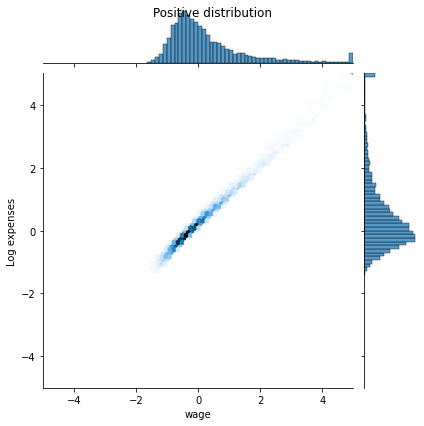

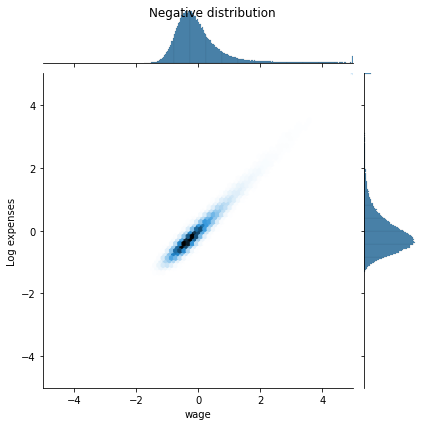

In [13]:
sns.jointplot(x=x1, y=y1, kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")
sns.jointplot(x=x2, y=y2, kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Negative distribution")

Text(0.5, 0.98, 'Negative distribution')

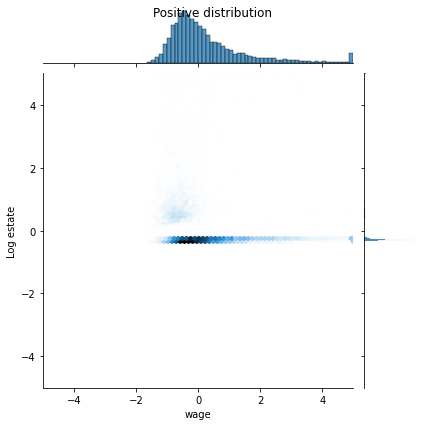

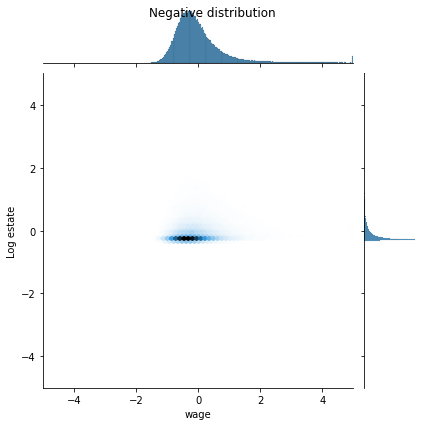

In [14]:
sns.jointplot(x=x1, y=y11, kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")
sns.jointplot(x=x2, y=y21, kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Negative distribution")

Text(0.5, 0.98, 'Negative distribution')

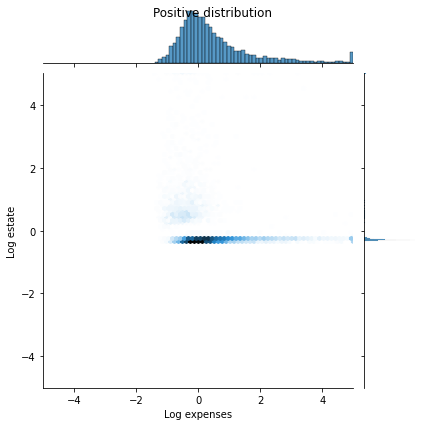

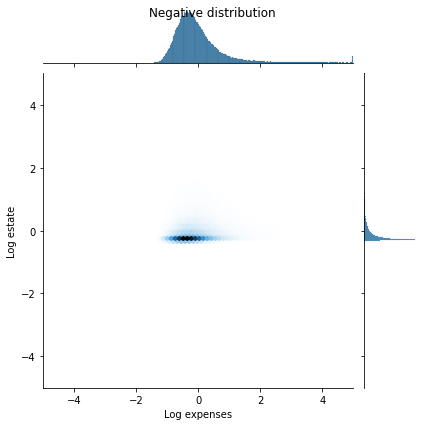

In [15]:
sns.jointplot(x=y1, y=y11, kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")
sns.jointplot(x=y2, y=y21, kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Negative distribution")

In [16]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = keras.Sequential([keras.layers.Dense(16, activation='relu', input_shape=(train_features.shape[-1],)), keras.layers.Dropout(0.5), keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias),])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss=keras.losses.BinaryCrossentropy(), metrics=metrics)
    return model

2022-09-07 19:52:43.865626: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Baseline model

In [17]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [18]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.predict(train_features[:10])

1/1 [==============================] - 0s 135ms/step


array([[0.79762983],
       [0.81928027],
       [0.82540387],
       [0.76179457],
       [0.9046891 ],
       [0.81710786],
       [0.78904873],
       [0.8869771 ],
       [0.8098508 ],
       [0.7744142 ]], dtype=float32)

In [20]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 1.6656


In [21]:
initial_bias = np.log([pos/neg])
initial_bias

array([-2.8911987])

In [22]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

1/1 [==============================] - 0s 53ms/step


array([[0.07211582],
       [0.06828057],
       [0.05796909],
       [0.02970162],
       [0.08877625],
       [0.02848073],
       [0.07601401],
       [0.08849537],
       [0.06745812],
       [0.05325746]], dtype=float32)

In [23]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.2195


In [24]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [25]:
model_1 = make_model()
model_1.load_weights(initial_weights)
model_1.layers[-1].bias.assign([0.0])
zero_bias_history = model_1.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [26]:
model_2 = make_model()
model_2.load_weights(initial_weights)
careful_bias_history = model_2.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [27]:
def plot_loss(history, label, n):
    # Use a log scale on y-axis to show the wide range of values.
    plt.semilogy(history.epoch, history.history['loss'],
            color=colors[n], label='Train ' + label)
    plt.semilogy(history.epoch, history.history['val_loss'],
            color=colors[n], label='Val ' + label,
            linestyle="--")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

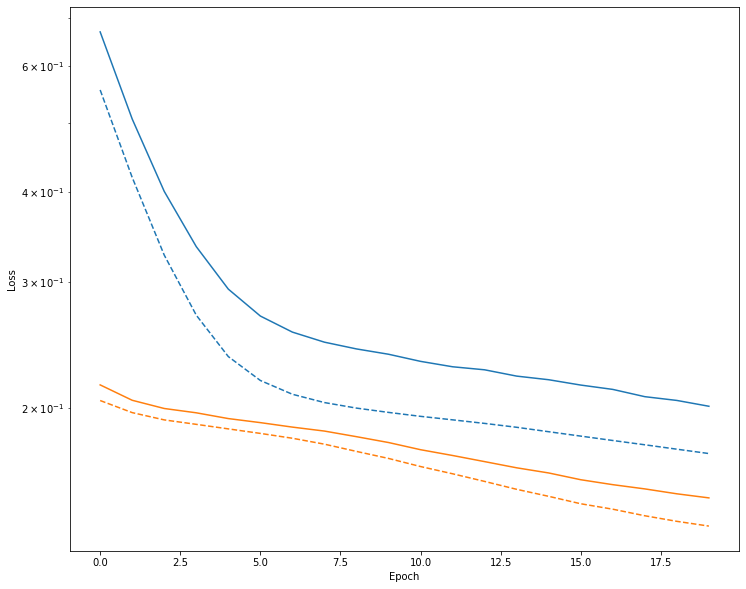

In [28]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [29]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
63/63 [==============================] - 6s 26ms/step - loss: 0.2157 - tp: 54.0000 - fp: 9.0000 - tn: 150956.0000 - fn: 8341.0000 - accuracy: 0.9476 - precision: 0.8571 - recall: 0.0064 - auc: 0.6065 - prc: 0.1493 - val_loss: 0.2050 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 30205.0000 - val_fn: 1667.0000 - val_accuracy: 0.9477 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5387 - val_prc: 0.1213
Epoch 2/100
63/63 [==============================] - 0s 5ms/step - loss: 0.2058 - tp: 16.0000 - fp: 31.0000 - tn: 120729.0000 - fn: 6712.0000 - accuracy: 0.9471 - precision: 0.3404 - recall: 0.0024 - auc: 0.5533 - prc: 0.0895 - val_loss: 0.1971 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 30205.0000 - val_fn: 1667.0000 - val_accuracy: 0.9477 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6816 - val_prc: 0.1672
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 0.2000 - tp: 30.0000 - fp: 57.0000 - tn: 120703

In [30]:
def plot_metrics(history):
    metrics = ['loss', 'prc', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                    color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.8,1])
        else:
            plt.ylim([0,1])
    plt.legend()

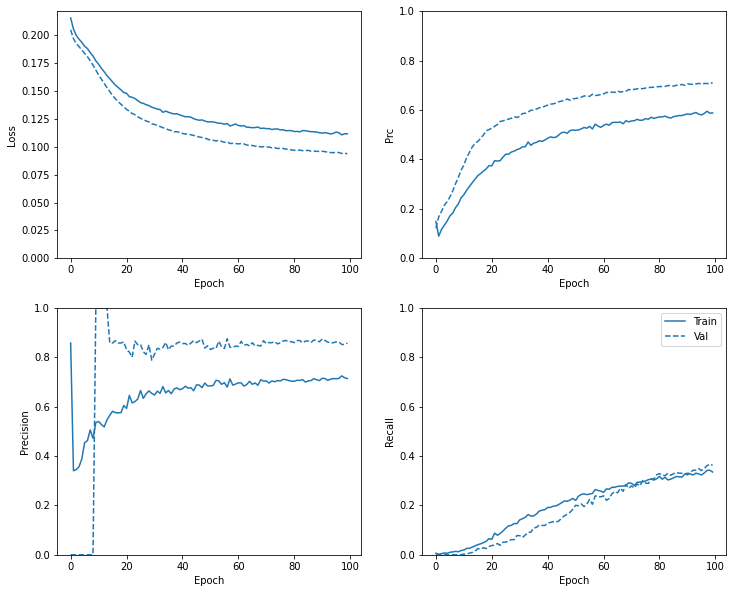

In [31]:
plot_metrics(baseline_history)

In [32]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

20/20 [==============================] - 0s 1ms/step


In [33]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('Legitimate Cases Detected (True Negatives): ', cm[0][0])
    print('Legitimate Cases Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Cases Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Cases Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Cases: ', np.sum(cm[1]))

loss :  0.09516952931880951
tp :  725.0
fp :  155.0
tn :  37604.0
fn :  1356.0
accuracy :  0.9620732665061951
precision :  0.8238636255264282
recall :  0.3483901917934418
auc :  0.970318078994751
prc :  0.6955707669258118

Legitimate Cases Detected (True Negatives):  37604
Legitimate Cases Incorrectly Detected (False Positives):  155
Fraudulent Cases Missed (False Negatives):  1356
Fraudulent Cases Detected (True Positives):  725
Total Fraudulent Cases:  2081


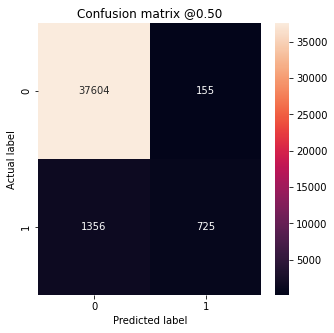

In [34]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)
plt.savefig('./results/confusion_model.png')

In [35]:
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.xlim([-0.5,20])
    plt.ylim([80,100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

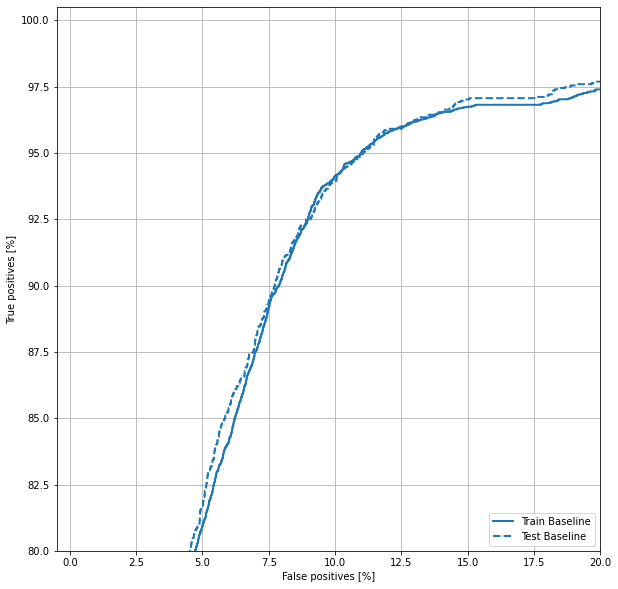

In [36]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [37]:
def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(labels, predictions)

    plt.plot(precision, recall, label=name, linewidth=2, **kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

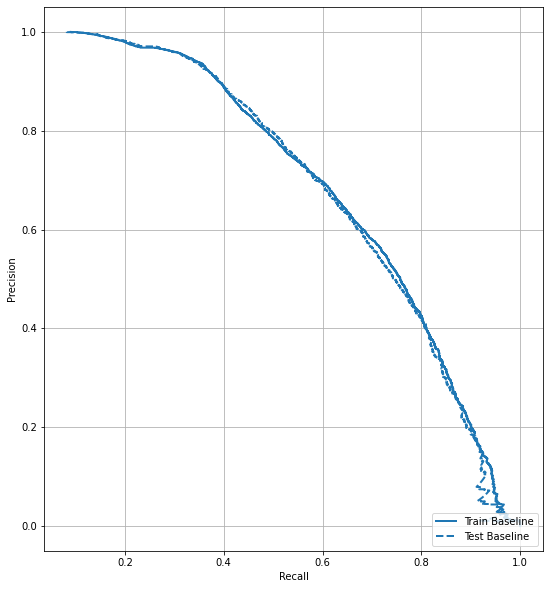

In [38]:
plot_prc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_prc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

# Weighting classes model

In [39]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.53
Weight for class 1: 9.51


In [40]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight)

Epoch 1/100
63/63 [==============================] - 3s 15ms/step - loss: 1.4227 - tp: 732.0000 - fp: 209.0000 - tn: 158310.0000 - fn: 8077.0000 - accuracy: 0.9505 - precision: 0.7779 - recall: 0.0831 - auc: 0.6369 - prc: 0.2027 - val_loss: 0.2248 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 30205.0000 - val_fn: 1667.0000 - val_accuracy: 0.9477 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4719 - val_prc: 0.0533
Epoch 2/100
63/63 [==============================] - 0s 3ms/step - loss: 1.1692 - tp: 172.0000 - fp: 1361.0000 - tn: 119399.0000 - fn: 6556.0000 - accuracy: 0.9379 - precision: 0.1122 - recall: 0.0256 - auc: 0.4898 - prc: 0.0608 - val_loss: 0.2613 - val_tp: 40.0000 - val_fp: 57.0000 - val_tn: 30148.0000 - val_fn: 1627.0000 - val_accuracy: 0.9472 - val_precision: 0.4124 - val_recall: 0.0240 - val_auc: 0.5217 - val_prc: 0.0930
Epoch 3/100
63/63 [==============================] - 0s 3ms/step - loss: 1.0038 - tp: 649.0000 - fp: 6556.0000 - tn: 114204.0000

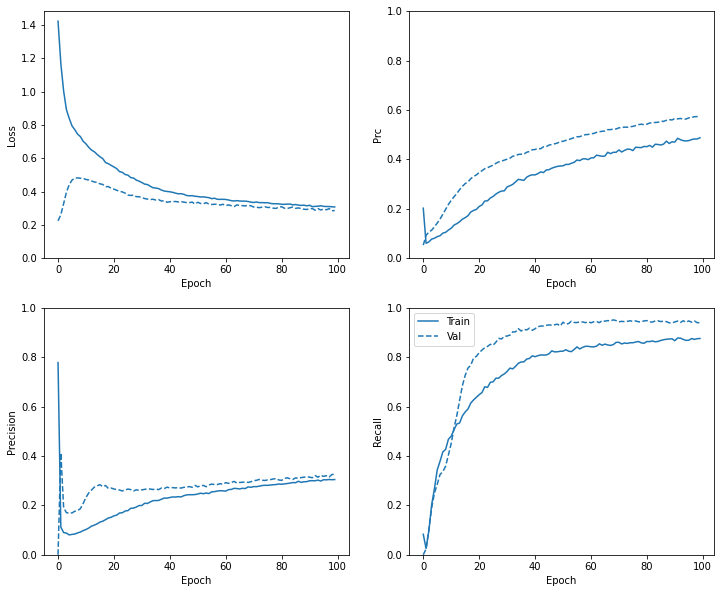

In [41]:
plot_metrics(weighted_history)

In [42]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

20/20 [==============================] - 0s 1ms/step


loss :  0.2880900502204895
tp :  1960.0
fp :  4064.0
tn :  33695.0
fn :  121.0
accuracy :  0.8949548006057739
precision :  0.32536521553993225
recall :  0.9418548941612244
auc :  0.9665462970733643
prc :  0.5653034448623657

Legitimate Cases Detected (True Negatives):  33695
Legitimate Cases Incorrectly Detected (False Positives):  4064
Fraudulent Cases Missed (False Negatives):  121
Fraudulent Cases Detected (True Positives):  1960
Total Fraudulent Cases:  2081


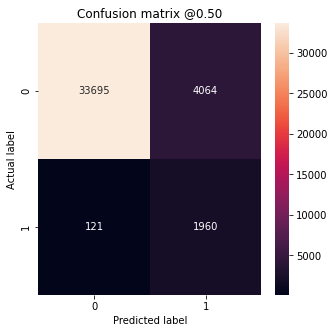

In [43]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)
plt.savefig('./results/confusion_weighted_model.png')

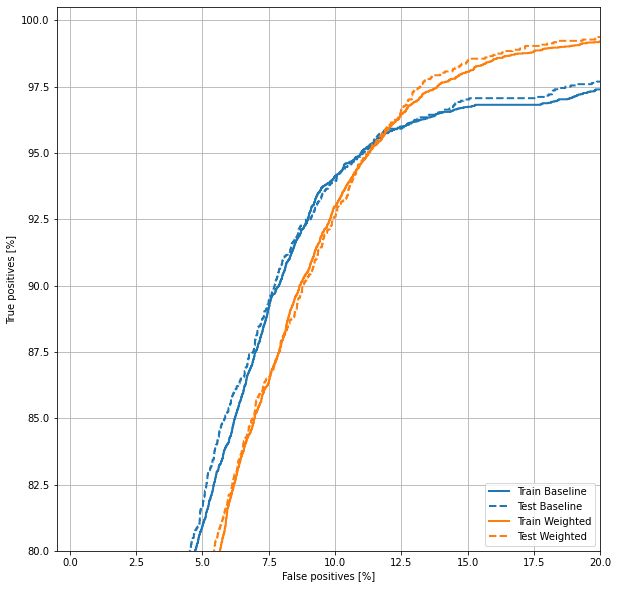

In [44]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

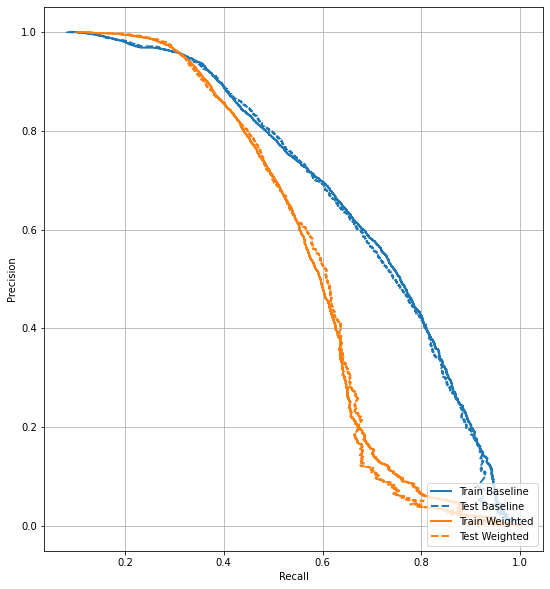

In [45]:
plot_prc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_prc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_prc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_prc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

# Under-sampling model

In [46]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [47]:
BUFFER_SIZE = 100000

def make_ds(features, labels):
    ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
    ds = ds.shuffle(BUFFER_SIZE).repeat()
    return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [48]:
for features, label in pos_ds.take(1):
    print("Features:\n", features.numpy())
    print()
    print("Label: ", label.numpy())

Features:
 [-0.53986331 -0.35113471  0.02810344 -0.3146118 ]

Label:  1


In [49]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

Instructions for updating:
Use `tf.data.Dataset.sample_from_datasets(...)`.


In [50]:
for features, label in resampled_ds.take(1):
    print(label.numpy().mean())

0.5009765625


In [51]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

185.0

In [52]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/100
185/185 [==============================] - 9s 40ms/step - loss: 0.6994 - tp: 102671.0000 - fp: 90398.0000 - tn: 136968.0000 - fn: 88683.0000 - accuracy: 0.5723 - precision: 0.5318 - recall: 0.5366 - auc: 0.6156 - prc: 0.5744 - val_loss: 0.6398 - val_tp: 1037.0000 - val_fp: 6803.0000 - val_tn: 23402.0000 - val_fn: 630.0000 - val_accuracy: 0.7668 - val_precision: 0.1323 - val_recall: 0.6221 - val_auc: 0.7577 - val_prc: 0.1881
Epoch 2/100
185/185 [==============================] - 6s 35ms/step - loss: 0.6282 - tp: 108266.0000 - fp: 48835.0000 - tn: 140797.0000 - fn: 80982.0000 - accuracy: 0.6574 - precision: 0.6891 - recall: 0.5721 - auc: 0.7191 - prc: 0.7183 - val_loss: 0.5899 - val_tp: 1181.0000 - val_fp: 5209.0000 - val_tn: 24996.0000 - val_fn: 486.0000 - val_accuracy: 0.8213 - val_precision: 0.1848 - val_recall: 0.7085 - val_auc: 0.8713 - val_prc: 0.2511
Epoch 3/100
185/185 [==============================] - 7s 36ms/step - loss: 0.5751 - tp: 126297.0000 - fp: 41693.0000 - 

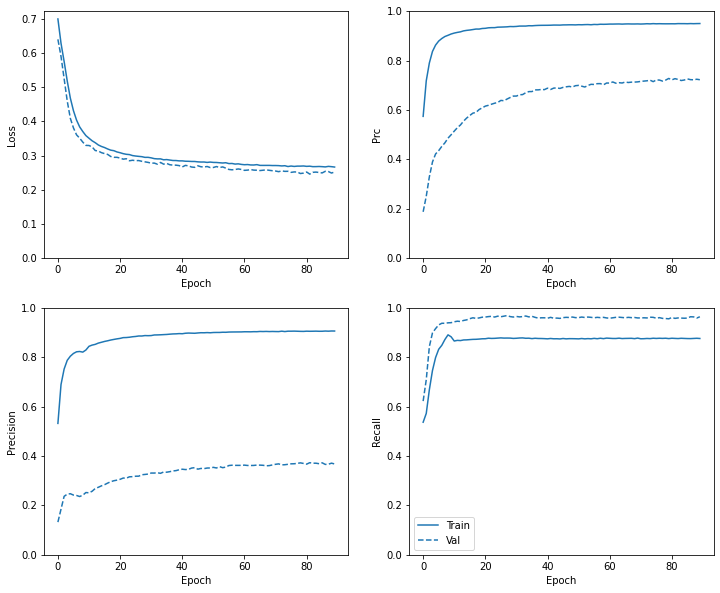

In [53]:
plot_metrics(resampled_history)

In [55]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

20/20 [==============================] - 0s 1ms/step


loss :  0.251627117395401
tp :  1994.0
fp :  3449.0
tn :  34310.0
fn :  87.0
accuracy :  0.9112449884414673
precision :  0.36634209752082825
recall :  0.9581931829452515
auc :  0.977249264717102
prc :  0.7155307531356812

Legitimate Cases Detected (True Negatives):  34310
Legitimate Cases Incorrectly Detected (False Positives):  3449
Fraudulent Cases Missed (False Negatives):  87
Fraudulent Cases Detected (True Positives):  1994
Total Fraudulent Cases:  2081


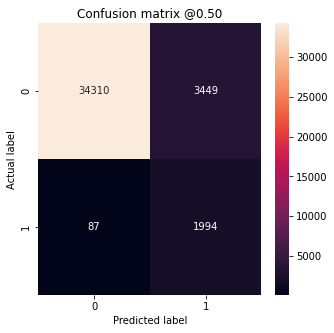

In [56]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)
plt.savefig('./results/confusion_resampled_model.png')

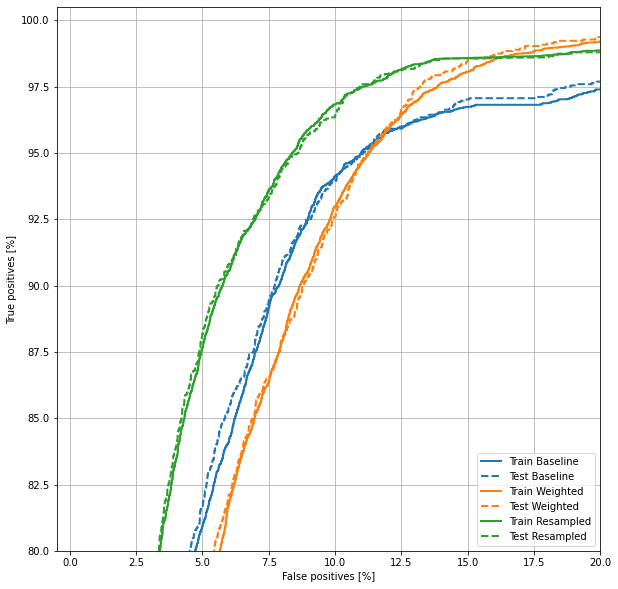

In [57]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')
plt.savefig('./results/ROC_NN.png')

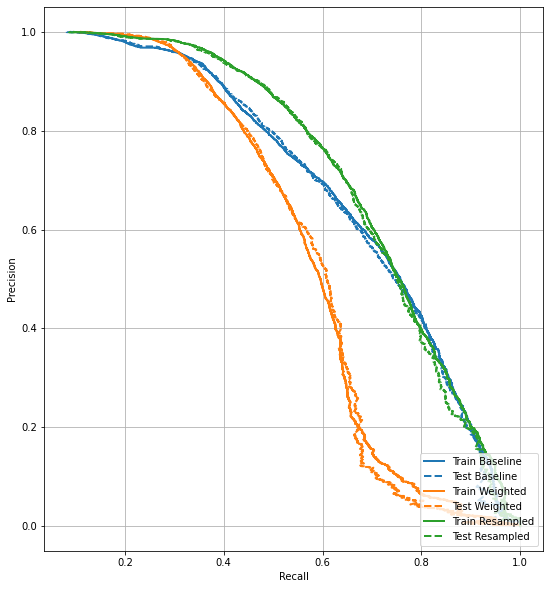

In [58]:
plot_prc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_prc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_prc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_prc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_prc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_prc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')
plt.savefig('./results/PRC_NN.png')

In [59]:
np.round(model.predict(train_features[:9]), decimals=3)

1/1 [==============================] - 0s 18ms/step


array([[0.001],
       [0.001],
       [0.522],
       [0.018],
       [0.001],
       [0.025],
       [0.103],
       [0.005],
       [0.003]], dtype=float32)

In [60]:
np.round(weighted_model.predict(train_features[:9]), decimals=3)

1/1 [==============================] - 0s 24ms/step


array([[0.026],
       [0.033],
       [0.971],
       [0.163],
       [0.03 ],
       [0.464],
       [0.457],
       [0.114],
       [0.059]], dtype=float32)

In [61]:
np.round(resampled_model.predict(train_features[:9]), decimals=3)

1/1 [==============================] - 0s 17ms/step


array([[0.   ],
       [0.   ],
       [0.973],
       [0.116],
       [0.   ],
       [0.31 ],
       [0.607],
       [0.008],
       [0.002]], dtype=float32)

# Random forest to optimize precision or recall

In [62]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
import joblib

In [63]:
lb = LabelBinarizer()
targets = lb.fit_transform(cleaned_df['is_fraudster'].values)

In [64]:
clf = RandomForestClassifier(n_jobs=1)

param_grid = {
    'min_samples_split': [3, 5, 10],
    'n_estimators': [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [65]:
X_train, X_test, y_train, y_test = train_df, test_df, np.expand_dims(train_labels, axis=1), np.expand_dims(test_labels, axis=1)

In [66]:
def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # make the predictions
    y_pred = grid_search.predict(X_test)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [68]:
grid_search_clf_precision = grid_search_wrapper(refit_score='precision_score')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Pytho

Best params for precision_score
{'max_depth': 15, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 300}

Confusion matrix of Random Forest optimized for precision_score on the test data:
     pred_neg  pred_pos
neg     37658       101
pos       248      1833


In [72]:
grid_search_clf_recall = grid_search_wrapper(refit_score='recall_score')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Pytho

Best params for recall_score
{'max_depth': 25, 'max_features': 3, 'min_samples_split': 3, 'n_estimators': 100}

Confusion matrix of Random Forest optimized for recall_score on the test data:
     pred_neg  pred_pos
neg     37655       104
pos       223      1858


In [ ]:
#grid_search_clf.predict_proba(X_test)

array([[9.99962560e-01, 3.74400443e-05],
       [9.99982334e-01, 1.76661198e-05],
       [1.00000000e+00, 0.00000000e+00],
       ...,
       [9.95475570e-01, 4.52443035e-03],
       [9.99996550e-01, 3.45026264e-06],
       [7.69990552e-01, 2.30009448e-01]])

In [77]:
pd.DataFrame(X_test.groupby('cat').count()['wage']).rename(columns={'wage': 'items number'})

items number
cat              
0            8609
1            9877
2           10415
3            7701
4            2654
5             584

In [95]:
train_random_forest_precision = np.expand_dims(grid_search_clf_precision.predict_proba(X_train)[:,1], axis=1)
test_random_forest_precision = np.expand_dims(grid_search_clf_precision.predict_proba(X_test)[:,1], axis=1)
train_random_forest_recall = np.expand_dims(grid_search_clf_recall.predict_proba(X_train)[:,1], axis=1)
test_random_forest_recall = np.expand_dims(grid_search_clf_recall.predict_proba(X_test)[:,1], axis=1)

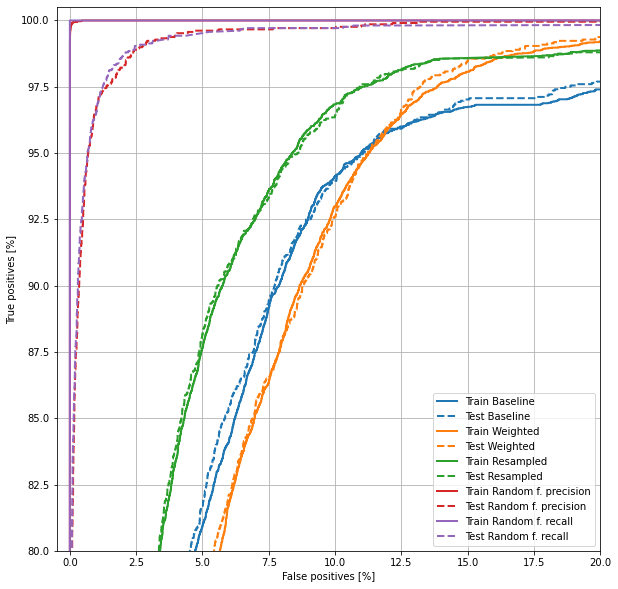

In [122]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')

plot_roc("Train Random f. precision", train_labels, train_random_forest_precision, color=colors[3])
plot_roc("Test Random f. precision", test_labels, test_random_forest_precision, color=colors[3], linestyle='--')

plot_roc("Train Random f. recall", train_labels, train_random_forest_recall, color=colors[4])
plot_roc("Test Random f. recall", test_labels, test_random_forest_recall, color=colors[4], linestyle='--')
plt.legend(loc='lower right')
plt.savefig('./results/ROC.png')

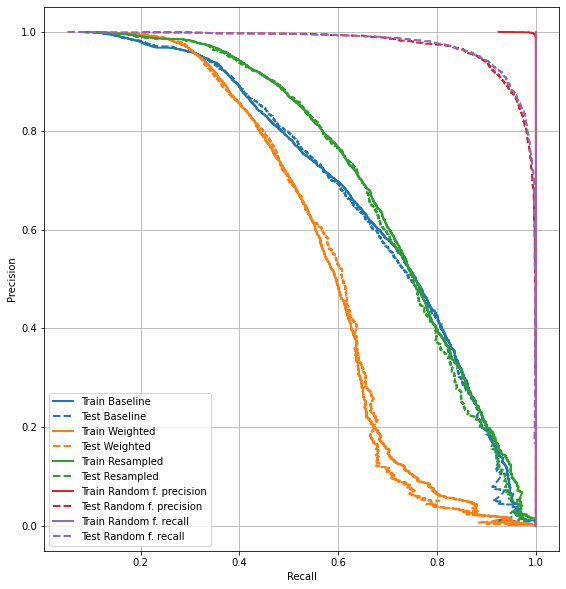

In [121]:
plot_prc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_prc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_prc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_prc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_prc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_prc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')

plot_prc("Train Random f. precision", train_labels, train_random_forest_precision, color=colors[3])
plot_prc("Test Random f. precision", test_labels, test_random_forest_precision, color=colors[3], linestyle='--')

plot_prc("Train Random f. recall", train_labels, train_random_forest_recall, color=colors[4])
plot_prc("Test Random f. recall", test_labels, test_random_forest_recall, color=colors[4], linestyle='--')
plt.legend(loc='lower left')
plt.savefig('./results/PRC.png')

In [114]:
from sklearn.metrics import roc_auc_score, average_precision_score

In [105]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [115]:
def multiclass_prc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return average_precision_score(y_test, y_pred, average=average)

In [116]:
y_pred_precision = np.expand_dims(grid_search_clf_precision.predict(X_test), axis=1)
print("Random f. - precision:")
print("AUC: {}".format(multiclass_roc_auc_score(y_test, y_pred_precision)))
print("PRC: {}".format(multiclass_prc_auc_score(y_test, y_pred_precision)))

Random f. - precision:
AUC: 0.9390758333673872
PRC: 0.8410516946471108


Legitimate Cases Detected (True Negatives):  37658
Legitimate Cases Incorrectly Detected (False Positives):  101
Fraudulent Cases Missed (False Negatives):  248
Fraudulent Cases Detected (True Positives):  1833
Total Fraudulent Cases:  2081


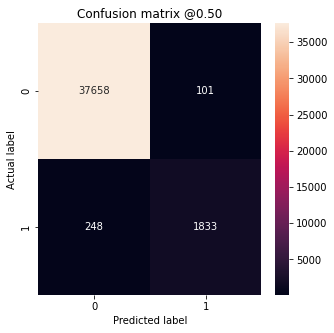

In [124]:
plot_cm(test_labels, test_random_forest_precision)
plt.savefig('./results/confusion_random_forest_precision.png')

In [117]:
y_pred_recall = np.expand_dims(grid_search_clf_recall.predict(X_test), axis=1)
print("Random f. - recall:")
print("AUC: {}".format(multiclass_roc_auc_score(y_test, y_pred_recall)))
print("PRC: {}".format(multiclass_prc_auc_score(y_test, y_pred_recall)))

Random f. - recall:
AUC: 0.9450428352738991
PRC: 0.8511104804279581


Legitimate Cases Detected (True Negatives):  37655
Legitimate Cases Incorrectly Detected (False Positives):  104
Fraudulent Cases Missed (False Negatives):  223
Fraudulent Cases Detected (True Positives):  1858
Total Fraudulent Cases:  2081


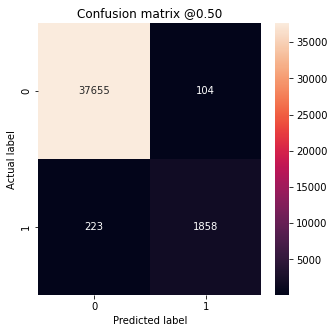

In [125]:
plot_cm(test_labels, test_random_forest_recall)
plt.savefig('./results/confusion_random_forest_recall.png')

# Save the parameters of the models

In [69]:
model.save('./parameters/model')

INFO:tensorflow:Assets written to: ./parameters/model/assets


In [70]:
resampled_model.save('./parameters/resampled_model')

INFO:tensorflow:Assets written to: ./parameters/resampled_model/assets


In [71]:
weighted_model.save('./parameters/weighted_model')

INFO:tensorflow:Assets written to: ./parameters/weighted_model/assets


In [76]:
joblib.dump(grid_search_clf_precision, './parameters/random_forest_precision.pkl')
joblib.dump(grid_search_clf_recall, './parameters/random_forest_recall.pkl')

['./parameters/random_forest_recall.pkl']

In [139]:
test = RandomForestClassifier(n_jobs=1)
test.fit(X_train, y_train)

/var/folders/23/x8rx2w892799llg9h7r4z0q00000gn/T/ipykernel_52111/1572842085.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  test.fit(X_train, y_train)


RandomForestClassifier(n_jobs=1)

In [140]:
y_pred_test = test.predict(X_test)
print(pd.DataFrame(confusion_matrix(y_test, y_pred_test), columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

     pred_neg  pred_pos
neg     37681        78
pos       258      1823
